In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.core.display import HTML

df = pd.read_csv('Amazon Sale Report.csv')

#<iframe src="#" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="AMAZON SALES DATA ANALYSIS"></iframe>

df.head()


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_1776\2243687671.py:7: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df.info


<bound method DataFrame.info of          index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment S

In [12]:
df.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [13]:
df=df.drop(df.columns[-1],axis=1)
df=df.drop('index',axis=1)

In [14]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [15]:
df.describe()

,Qty,Amount,ship-postal-code
count,128975.000000,121180.000000,128942.000000
mean,0.904431,648.561465,463966.236509
std,0.313354,281.211687,191476.764941
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [17]:
df[df.duplicated()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,1,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [18]:
df = (df.drop_duplicates(keep='first').reset_index(drop=True))

In [20]:
df.isna().sum()
 

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [21]:
have_null_coll=['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country','promotion-ids']
for i in have_null_coll:
    mode=df[i].mode()[0]
    df[i]=df[i].fillna(mode)
df['Amount']=df['Amount'].fillna(df['Amount'].median())

In [22]:
df.isna().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code         33
ship-country              0
promotion-ids             0
B2B                       0
fulfilled-by          89692
dtype: int64

In [23]:
IQR = df['Amount'].quantile(0.75)- df['Amount'].quantile(0.25)
1.5*IQR
upper_bound= df['Amount'].quantile(0.75) + 1.5*IQR   
lower_bound = df['Amount'].quantile(0.25) - 1.5*IQR 
Median = df['Amount'].median()
df['Amount'] = df['Amount'].apply(lambda x: Median if x > upper_bound  or x < lower_bound else x) 

In [24]:
df['Amount'] = df['Amount'].apply(lambda x: Median if x == 0 else x)

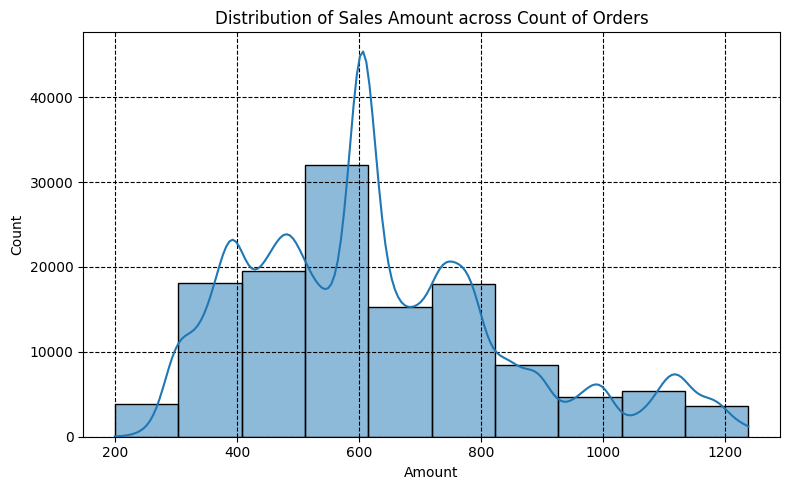

In [25]:
fig, my_ax = plt.subplots(figsize=(8,5))

sns.histplot(data = df['Amount'], ax=my_ax, binwidth=100, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()


In [26]:
Top5_Trending_product=df.groupby('Category')['Amount'].sum().to_frame().sort_values(['Amount'],ascending=False).head(5)

In [27]:
Top5_Trending_product

,Amount
Category,
Set,38581957.01
kurta,23692693.22
Western Dress,11724761.12
Top,5721433.30
Ethnic Dress,832975.66


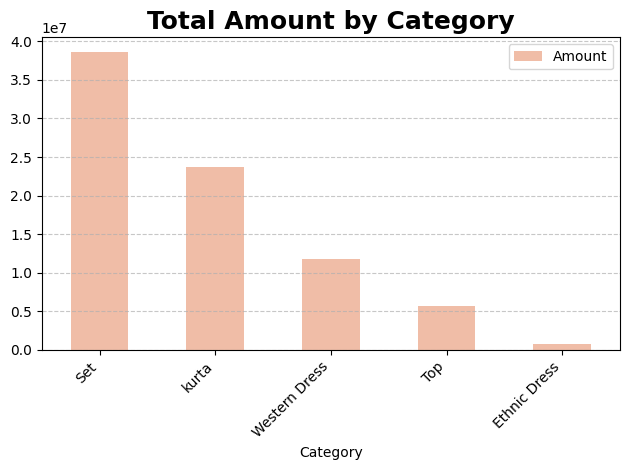

In [30]:
Top5_Trending_product.plot(kind='bar',color='#f0bda7')
plt.title('Total Amount by Category', fontsize=18, weight='bold')

90plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
Top5_cities_orderfrom_Amazon=df.groupby('ship-city')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head()

In [33]:
Top5_cities_orderfrom_Amazon


,Amount
ship-city,
BENGALURU,7058584.03
HYDERABAD,5094404.89
MUMBAI,3802823.69
NEW DELHI,3752356.03
CHENNAI,3233757.37


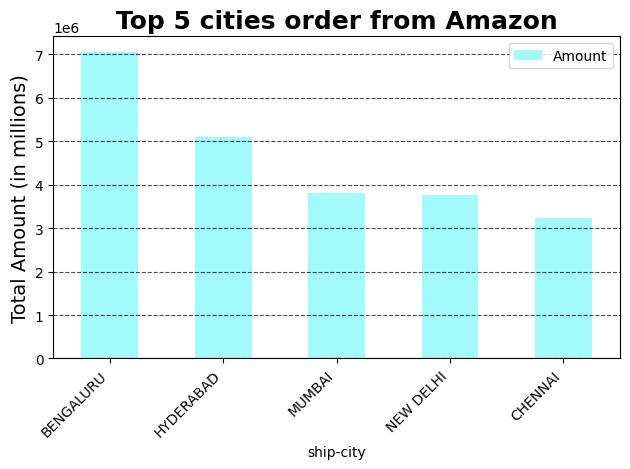

In [40]:
Top5_cities_orderfrom_Amazon.plot(kind='bar',color='#a3fafb')
plt.title('Top 5 cities order from Amazon',fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--',color='#000000', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
